<a href="https://colab.research.google.com/github/Chaithra007/Mall_customers/blob/main/DA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                                        **DATA PREPROCESSING**

In [ ]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import plotnine as p9
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report,r2_score 


In [ ]:
#Reading datasets
train=pd.read_csv("/content/train1.csv")
test=pd.read_csv("/content/test1.csv")

In [ ]:
#train dataframe
train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54,0


In [ ]:
#test dataframe
test.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,0,76


In [ ]:
#Shape of test and train datasets
print("Shape of training data: ",train.shape)
print("Shape of testing data: ",test.shape)

Shape of training data:  (54808, 13)
Shape of testing data:  (23490, 12)


In [ ]:
#Summary statistics of train data
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [ ]:
#Summary statistics of test data
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


In [ ]:
test.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,23490,23490,22456,23490,23490
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,7315,5299,15578,16596,13078


**DATA CLEANING**

In [ ]:
#Calculating total missing values in the train dataset
train_count = train.isnull().sum() 
train_count

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
#To calculate the total missing values in the test dataset 
test_count = test.isnull().sum()
test_count


employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
##To calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2) 
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)
print("Percentage of missing train data:\n",train_percent)
print("Percentage of missing test data:\n ",test_percent)


Percentage of missing train data:
 employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64
Percentage of missing test data:
  employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.71
length_of_service       0.00
awards_won?             0.00
avg_training_score      0.00
dtype: float64


In [ ]:
#Impution of missing values

In [ ]:
#Imputing missing values in education column with mode 
train['education'] = train['education'].fillna(train['education'].mode()[0])
#Filling missing values in previous_year_rating column with mode 
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])


In [ ]:
#check if missing values in train dataset are replaced
train_count = train.isnull().sum() 
train_count

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
#Filling missing values in education column with mode 
test['education'] = test['education'].fillna(test['education'].mode()[0])
#Filling missing values in previous_year_rating column with mode 
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])


In [ ]:
#check if missing values in test dataset are replaced
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

In [ ]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [ ]:
#Converting object columns of train data into categorical
list_str_obj_cols = train.columns[train.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    train[str_obj_col] = train[str_obj_col].astype("category")
train.dtypes

employee_id                int64
department              category
region                  category
education               category
gender                  category
recruitment_channel     category
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
awards_won?                int64
avg_training_score         int64
is_promoted                int64
dtype: object

In [ ]:
#Converting object columns of test data into categorical
list_str_obj_cols = test.columns[test.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    test[str_obj_col] = test[str_obj_col].astype("category")
test.dtypes

employee_id                int64
department              category
region                  category
education               category
gender                  category
recruitment_channel     category
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
awards_won?                int64
avg_training_score         int64
dtype: object

In [ ]:
#Check for duplicate records
condition = bool(train.duplicated(subset = 'employee_id').any())

if condition:
    print('There are duplicate employee IDs')
else:
    print('No duplicate employee IDs')

No duplicate employee IDs


There are no duplicate records in the csv file

## EDA (Exploratory Data Analysis)


In [ ]:
#Check class balance
train.is_promoted.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

From above it is observed that the number of 1's and 0's are unbalanced,therefore we need to use undersampling or oversampling techniques to balance the training dataset.

**UNIVARIATE ANALYSIS**

Text(0, 0.5, 'Count')

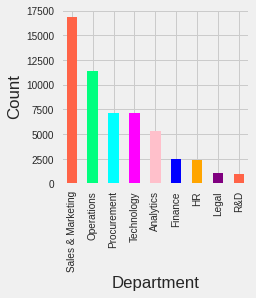

In [ ]:
#Plot distribution of department 
department=train['department'].value_counts()
c=['tomato','springgreen', 'aqua','magenta','pink', 'blue', 'orange','purple']
department.plot(kind='bar',color=c)
plt.xlabel("Department")
plt.ylabel("Count")

Based on the bar plot above, we can see that the Sales & Marketing department is the department with the most employees.

Text(0, 0.5, 'Count')

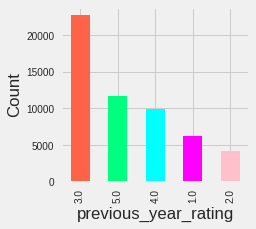

In [ ]:
#Plot distribution for previous_year_rating
ratings=train['previous_year_rating'].value_counts()
c=['tomato','springgreen', 'aqua','magenta','pink', 'blue', 'orange','purple']
ratings.plot(kind='bar',color=c)
plt.xlabel("previous_year_rating")
plt.ylabel("Count")

We can see that the most employees have rating three

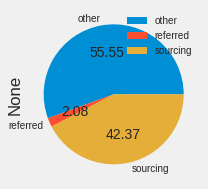

In [ ]:
#plot distribution for recruitment channel
recruitment_channel=train["recruitment_channel"]
train.groupby('recruitment_channel').size().plot(kind='pie',autopct='%.2f')
labels=['other','referred','sourcing']
plt.legend(labels)

Based on the above plot we conclude that most of the employees donot belong to any source or referred recruitment channel.

Text(0, 0.5, 'count')

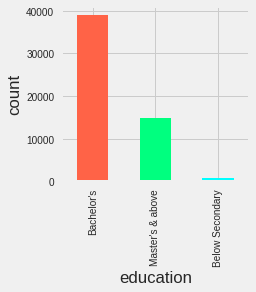

In [ ]:
#plot distribution for education
education=train['education'].value_counts()
c=['tomato','springgreen', 'aqua','magenta','pink', 'blue', 'orange','purple']
education.plot(kind='bar',color=c)
plt.xlabel("education")
plt.ylabel("count")


Based on the above plot it can be seen that most of the employees have their education background in bachelors degree.

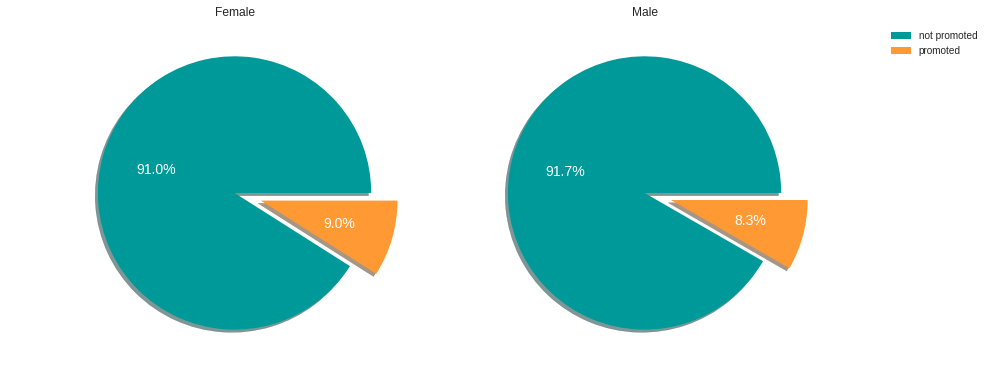

In [ ]:
#plot distribution for gender
plt.style.use('seaborn')
plt.subplots(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(
    x=train[train.gender=='f'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']
)
plt.title("Female")
plt.subplot(1,2,2)
plt.pie(
    x=train[train.gender=='m'].is_promoted.value_counts(normalize=True),
    labels=['not promoted','promoted'],
    explode=[0,0.2],
    autopct="%1.1f%%",
    shadow=True,
    textprops=dict(color='w',fontsize=14),
    colors=['#009999','#ff9933']
)
plt.title("Male")
plt.legend(['not promoted','promoted'],loc='upper right', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

Opposite to the assumption, the females have more promotions as compared to the males. The pie charts concludes that the two genders have equal proportions of promotions. This does not mean that equal number of females and males were promoted. As established earlier, the population of males is far greater than female. The proportions calculated are with respect to their population.


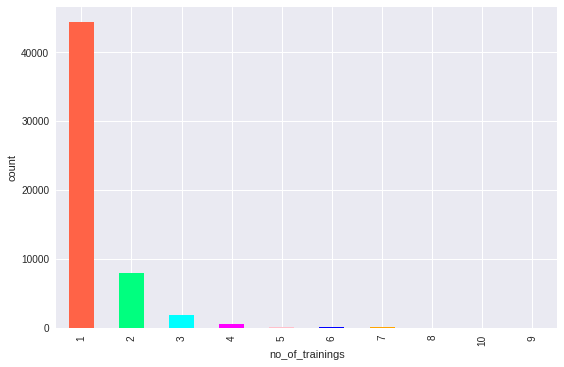

In [ ]:
#plot distribution for Number of trainigs
Number_of_trainings=train['no_of_trainings'].value_counts()
c=['tomato','springgreen', 'aqua','magenta','pink', 'blue', 'orange','purple']
plt.xlabel('no_of_trainings')
plt.ylabel('count')
Number_of_trainings.plot(kind='bar',color=c)

It can be seen that most of the employees have been previously trained only once.

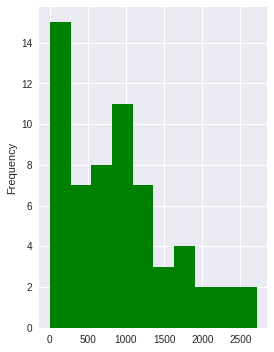

In [ ]:
#Plot distribution for average training score
Average_training_score=train['avg_training_score'].value_counts()
plt.xlabel('avg_training_score')
plt.ylabel('count')
plt.subplot(1,2,2)
Average_training_score.plot(kind='hist',color='green')

From the above plot it can be concluded that most employees only attend one training and most of them have training score 50.

Text(0.5, 0, 'age category')

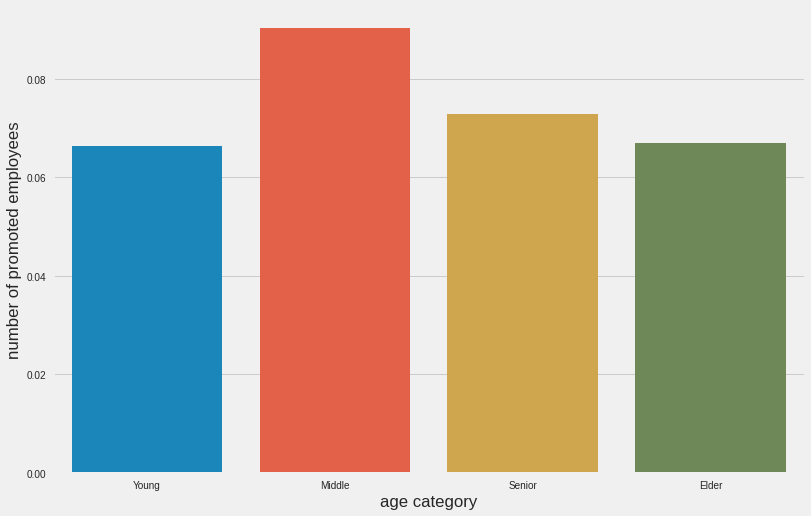

In [ ]:

train['age_label'] = pd.cut(train.age,bins=[0,25,40,50,100],labels=['Young','Middle','Senior','Elder'])
train.head(5)
ages = train.pivot_table(values='is_promoted',index='age_label')
ages
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=ages.index,
    y=ages.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('age category')

An employee aged between 25 and 40 years is likely to be promoted.
A senior employee aged 40 to 50 years has a good chance of getting promoted.
A Middle aged or Senior employee form the perfect age interval (25 to 50) where an employee is said to at the peak of his/her career.
Younger or Elder employees have lesser chances of being promoted as the former has just begun their career and the latter is coming towards an end to their career.

**BIVARIATE ANALYSIS**

Text(0.5, 1.0, 'Distribution of age and is_promoted')

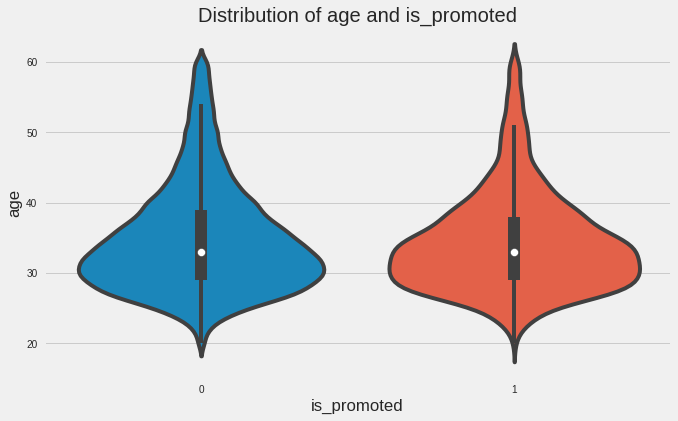

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x=train["is_promoted"], y=train["age"], data=train)
plt.title('Distribution of age and is_promoted')

It can be seen that employee either promoted or not promoted belong to age group around 30.

Text(0, 0.5, 'count')

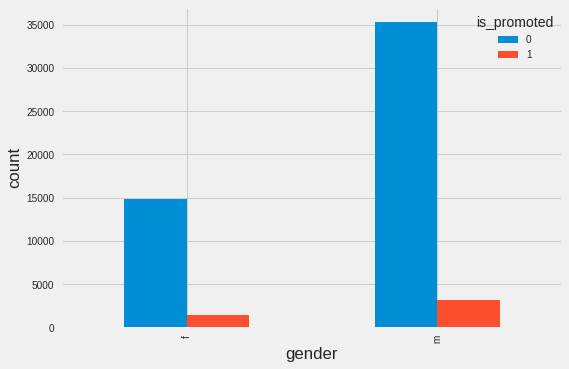

In [ ]:
#Plot distribution of gender and is_promoted using bar plot.
gender=train['gender']
is_promoted=train['is_promoted']
pd.crosstab(gender,is_promoted).plot(kind='bar')
plt.xlabel("gender")
plt.ylabel("count")

As shown by the bar plot above,male employees are promoted more frequently than female employees Additionally, there are still more male employees than female employees who do not receive promotions.

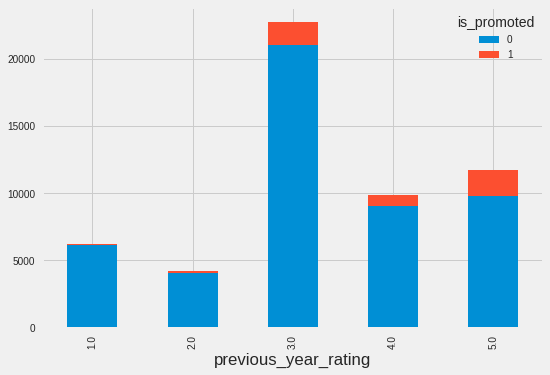

In [ ]:
#Plot distribution of previous_year_rating and promotion
previous_year_rating=train['previous_year_rating']
promotion=train['is_promoted']
pd.crosstab(previous_year_rating,promotion).plot(kind='bar',stacked=True)


From the above plot it can be seen number of employees promoted with rating above 3 are high in number

Text(0, 0.5, 'count')

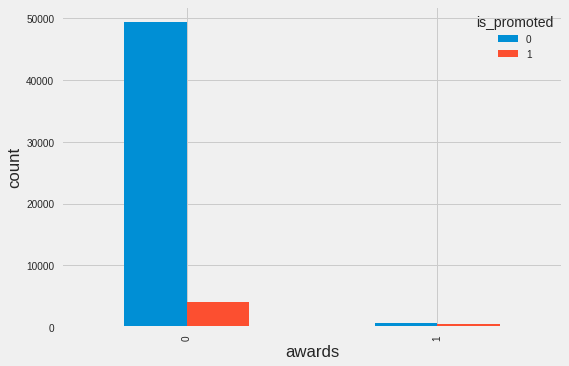

In [ ]:
#Plot distribution of awards won and promotion using bar plot.
awards=train['awards_won?']
is_promoted=train['is_promoted']
pd.crosstab(awards,is_promoted).plot(kind='bar')
plt.xlabel("awards")
plt.ylabel("count")

Based on the above bar plot,we can see that employees who have not received awards are promoted more than employees who have received awards.

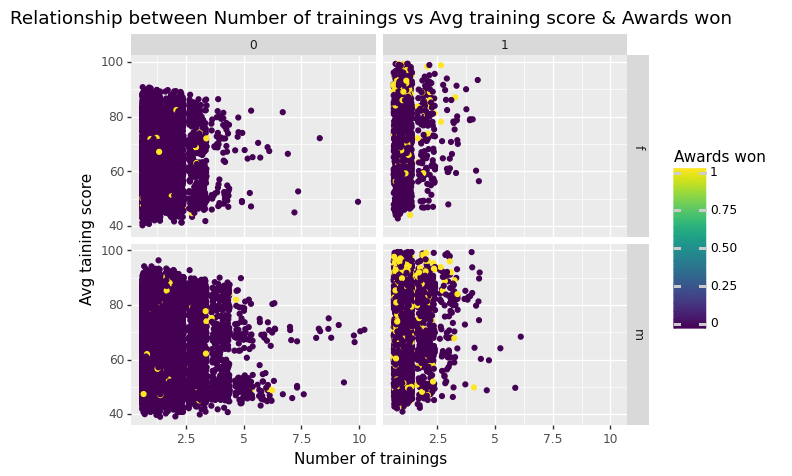

<ggplot: (8770699417917)>

In [ ]:
#Multivariate analysis
# Relationship between is_promoted and avg_training_score
(p9.ggplot(data=train,
           mapping=p9.aes(x='no_of_trainings',
                          y='avg_training_score',
                          color='awards_won?'))
    + p9.geom_point(position = "jitter")
    + p9.facet_grid("gender ~ is_promoted")+p9.labs(title = "Relationship between Number of trainings vs Avg training score & Awards won",
       x = "Number of trainings",
       y = "Avg taining score",
       color = "Awards won")
)

Based on the relationship above, we can see that the distribution of male and female employees who participated in one training received an award and would be promoted.

**INSIGHTS FROM EDA**
1.The dataset shows unbalanced data, causing the data to tend to favor one of the binaries (is_promoted).
2.From this data, it can be seen that employees with length_of_service less than 10 years have no_of_training in the range 0-1, so it is difficult to relate them to other variables.
3.There are outliers in the gender variable in the age range of 55-60 years.

In [ ]:
#Now, we must create corrgram to see a correlation coefficient variable
corr_matrix=train.corr()
corr_matrix

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.039927,-0.038122,-0.010670
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.195871,0.181147,1.000000


Based on corrgram above, we can see that previous_year_rating, awards_won, and avg_training_score have big correlation coefficient to is_promoted

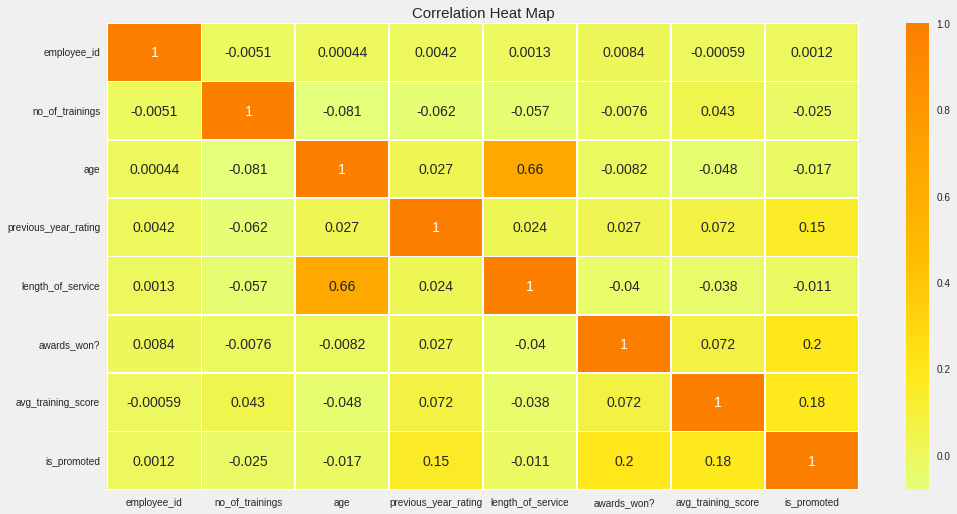

In [ ]:
# lets check the Heat Map for the Data with respect to correlation.
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()


In [ ]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted',
       'age_label'],
      dtype='object')

**FEATURE EXTRACTION**

In [ ]:
#Removing some of the columns which are not useful for predicting the promotion.
train = train.drop(['recruitment_channel', 'region', 'employee_id','age_label'], axis = 1) 

test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
train.columns



Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
#Converting categorical data into numerical data using label encoder
le = LabelEncoder()
train['education']=le.fit_transform(train['education'])
test['education']=le.fit_transform(test['education'])
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department']) 
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])
print(train.head())
print(test.head())

   department  education  gender  no_of_trainings  age  previous_year_rating  \
0           7          2       0                1   35                   5.0   
1           4          0       1                1   30                   5.0   
2           7          0       1                1   34                   3.0   
3           7          0       1                2   39                   1.0   
4           8          0       1                1   45                   3.0   

   length_of_service  awards_won?  avg_training_score  is_promoted  
0                  8            0                  49            0  
1                  4            0                  60            0  
2                  7            0                  50            0  
3                 10            0                  50            0  
4                  2            0                  73            0  
   department  education  gender  no_of_trainings  age  previous_year_rating  \
0           8          0 

**OUTLIER ANALYSIS**

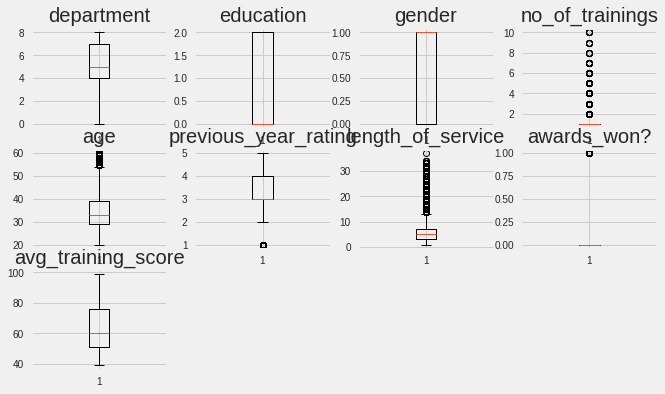

In [ ]:
col=['department', 'education','gender', 'no_of_trainings', 'age','previous_year_rating','length_of_service', 'awards_won?','avg_training_score']
plt.figure(figsize=(10,10))
for i in range(0,len(col)):
   plt.subplot(5, 4, i+1)
   plt.boxplot(train[col[i]])
   plt.title(col[i])

**DATA SPLITTING**

In [ ]:
#Splitting target data from train data
y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1) 
x_test = test
print(x_test.head(10))


   department  education  gender  no_of_trainings  age  previous_year_rating  \
0           8          0       1                1   24                   3.0   
1           2          0       0                1   31                   3.0   
2           7          0       1                1   31                   1.0   
3           5          0       0                3   31                   2.0   
4           1          0       1                1   30                   4.0   
5           5          0       1                1   36                   3.0   
6           1          0       1                1   33                   5.0   
7           0          0       1                2   36                   3.0   
8           8          2       1                1   51                   4.0   
9           8          0       1                1   29                   5.0   

   length_of_service  awards_won?  avg_training_score  
0                  1            0                  77  
1      

In [ ]:
# lets print the shapes of these newly formed data sets print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)


Shape of the y : (54808,)
Shape of the x Test : (23490, 9)


In [ ]:
#Balancing the data
resampler = RandomOverSampler(random_state=1)
X_res,y_res = resampler.fit_resample(x,y)
print(X_res.shape)
print(y_res.value_counts(normalize=True))

(100280, 9)
0    0.5
1    0.5
Name: is_promoted, dtype: float64


In [ ]:
# lets print the shape of x and y after resampling it
print(X_res.shape) 
print(y_res.shape)



(100280, 9)
(100280,)


In [ ]:
#We are resampling the data because the given data is highly imbalanced
print("Before Resampling :") 
print(y.value_counts())

print("After Resampling :")
print(y_res.value_counts())




Before Resampling :
0    50140
1     4668
Name: is_promoted, dtype: int64
After Resampling :
0    50140
1    50140
Name: is_promoted, dtype: int64


The data in the column is_promoted is now balanced.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,random_state=0)
# lets print the shapes again
print("Shape of the x Train :", X_train.shape) 
print("Shape of the y Train :", y_train.shape) 
print("Shape of the x Valid :", X_test.shape) 
print("Shape of the y Valid :", y_train.shape) 
print("Shape of the x Test :", x_test.shape)



Shape of the x Train : (75210, 9)
Shape of the y Train : (75210,)
Shape of the x Valid : (25070, 9)
Shape of the y Valid : (75210,)
Shape of the x Test : (23490, 9)


**STANDARDISATION OF DATA**

In [ ]:
#Here we are standardizing the data set using standardization method

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
x_test = sc.transform(x_test)




In [ ]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print (pca.explained_variance_ratio_)

[0.21221132 0.14912405 0.12039629 0.11050511 0.10611448]


**DECISION TREE CLASSIFIER**

In [ ]:
# Lets use Decision Trees to classify the data 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)
#prediction of test values
y_pred = model.predict(X_test)
y_pred


array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
print("Training Accuracy :", model.score(X_train, y_train)) 
print("Testing Accuracy :", model.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("r2 score: ", r2_score(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))

Training Accuracy : 0.9870495944688207
Testing Accuracy : 0.9513362584762665
Accuracy: 0.9513362584762665
r2 score:  0.8053374964830258
RMSE:  0.2205985981907717
mean_absolute_error:  0.048663741523733546


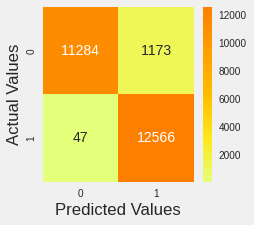

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred) 
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g') 
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values') 
plt.show()


**LOGISTIC REGRESSION**

In [ ]:
#Model Development and Prediction
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression(random_state=16)
modelLogistic.fit(X_train, y_train)
#Prediction of values
y_pred = modelLogistic.predict(X_test)


In [ ]:
#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[8342 4115]
 [4343 8270]]


Text(0.5, 194.08000000000004, 'Predicted label')

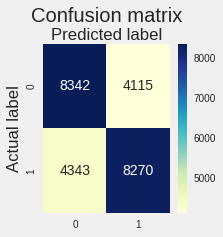

In [ ]:
#Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
target_names = ['not promoted', 'promoted']
print(classification_report(y_test, y_pred, target_names=target_names))
print("r2 score: ", r2_score(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))


              precision    recall  f1-score   support

not promoted       0.66      0.67      0.66     12457
    promoted       0.67      0.66      0.66     12613

    accuracy                           0.66     25070
   macro avg       0.66      0.66      0.66     25070
weighted avg       0.66      0.66      0.66     25070

r2 score:  -0.34955365143161354
RMSE:  0.5808402095436717


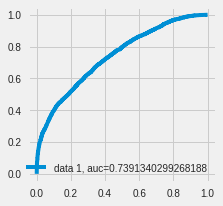

In [ ]:
y_pred_proba =modelLogistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.74 which implies that the model would be considered acceptable as the AUC for the model is above 0.7

RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)


In [ ]:
#Train the model using the training sets 
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred
# y_pred_1=clf.predict(x_test)
# y_pred_1


array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
df = pd.DataFrame(y_pred, columns = ['promotion'])
df

,promotion
0,1
1,1
2,1
3,1
4,1
...,...
25065,1
25066,1
25067,1
25068,1


In [ ]:
df.to_csv("Promotion_Prediction_values.csv")

In [ ]:
# Model Accuracy, how often is the classifier correct
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("r2 score: ", r2_score(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     12457
           1       0.94      1.00      0.97     12613

    accuracy                           0.97     25070
   macro avg       0.97      0.97      0.97     25070
weighted avg       0.97      0.97      0.97     25070

Accuracy: 0.9689270043877144
r2 score:  0.8757032047215385
RMSE:  0.1762753403408588
mean_absolute_error:  0.0310729956122856
[[11712   745]
 [   34 12579]]


Text(0.5, 194.08000000000004, 'Predicted label')

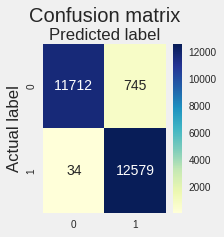

In [ ]:
#Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Support Vector Machine (SVM)

In [ ]:
#Import svm model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
# param_grid = {'C': [0.1], 
#               'gamma': [1,0.1],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
# grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
# print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [ ]:
# grid_predictions = grid.predict(X_test)
  
# print classification report
# print(classification_report(y_test, grid_predictions))

Since Random Forest is giving us the accuracy of 0.97 which is the best of all the 4 models so we choose random forest to make prediction

Multiple Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
# creating a regression model
model = LinearRegression()
# fitting the model
a=model.fit(X_train,y_train)


In [ ]:
# making predictions
# extract the predicted probabilities
predictions = model.predict(X_test)
p_pred = predictions.flatten()
print(p_pred.round(2))
# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)
conf_matrix=confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))
print("r2 score: ", r2_score(y_test,y_pred))
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('mean_absolute_error : ', mean_absolute_error(y_test,y_pred))


[0.57 1.   0.38 ... 0.55 0.61 0.23]
[1 1 0 ... 1 1 0]
[[8386 4071]
 [4382 8231]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.66     12457
           1       0.67      0.65      0.66     12613

    accuracy                           0.66     25070
   macro avg       0.66      0.66      0.66     25070
weighted avg       0.66      0.66      0.66     25070

r2 score:  -0.34875585428605227
mean_squared_error :  0.33717590745911447
mean_absolute_error :  0.33717590745911447


Text(0.5, 194.08000000000004, 'Predicted label')

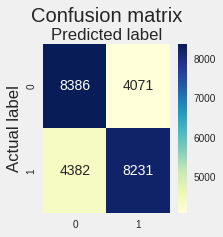

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')